#  __Assignment-4__ 

Name: <span style="color:orange">  **Anantha Padmanabhan M Nair** </span>

Roll No: <span style="color:orange"> **2011019**</span>



In [6]:
import numpy as np
import scipy as sp
import math as m
import prettytable as pt
import Library_asgn4 as lib

<hr>

# Question-1

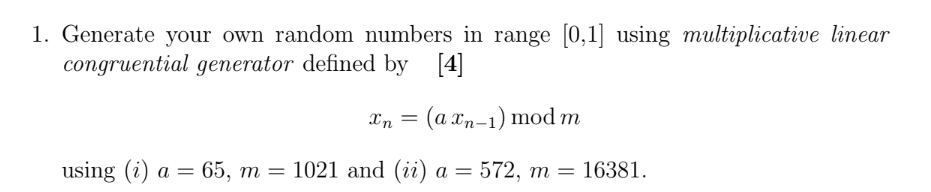

### Initializing the RNG Class with different a and m as mentioned in the Question

In [7]:
rng_1 = lib.rng(seed=11,a=65,m=1021,c=0)
rng_2 = lib.rng(seed=11,a=572,m=16381,c=0)

### Generating the Random Numbers

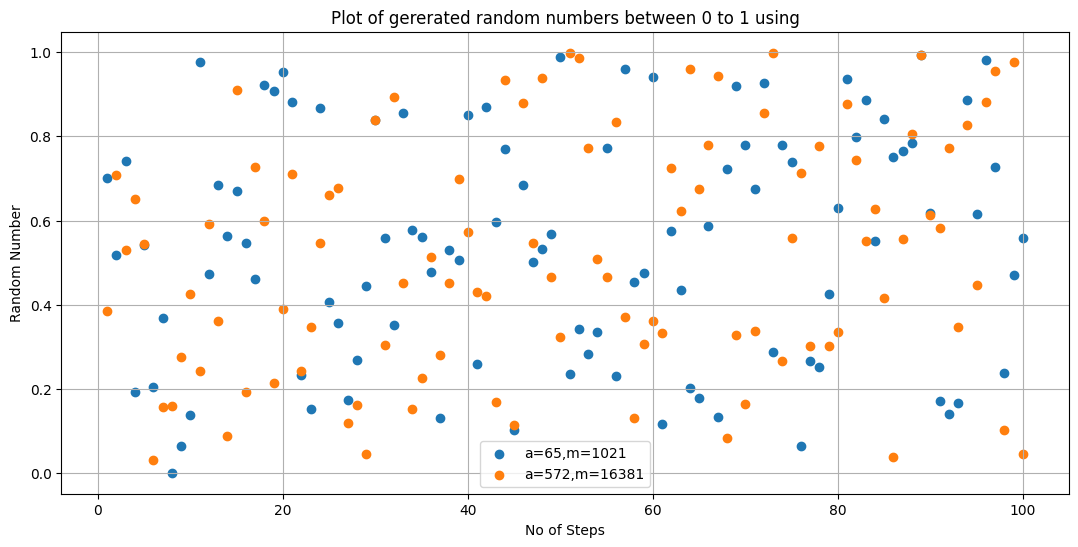

In [8]:
xlist = [i for i in range(1,101)]
ylist_1 = [rng_1.gen() for i in range(1,101)]
ylist_2 = [rng_2.gen() for i in range(1,101)]

import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.scatter(xlist,ylist_1,label='a=65,m=1021')
plt.scatter(xlist,ylist_2,label='a=572,m=16381')
plt.xlabel('No of Steps')
plt.ylabel('Random Number')
plt.title('Plot of gererated random numbers between 0 to 1 using')
plt.legend()
plt.grid()
plt.show()

<hr>

# Question-2


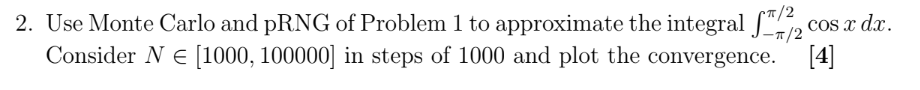

#### Calculating the integral using the Monte Carlo Method

In [9]:
def f(x):
    return np.cos(x)


x_min = -np.pi/2
x_max = np.pi/2

I = lib.monte_carlo_integrate(f,x_min,x_max,10000,17,multiplier=572,m=16381,c=0)
print("The value of integral is ",I, "using 10000 points")    

The value of integral is  2.0065394710490914 using 10000 points


#### Plotting the difference between the calculated integral and the actual integral which on calculation gives us 2.

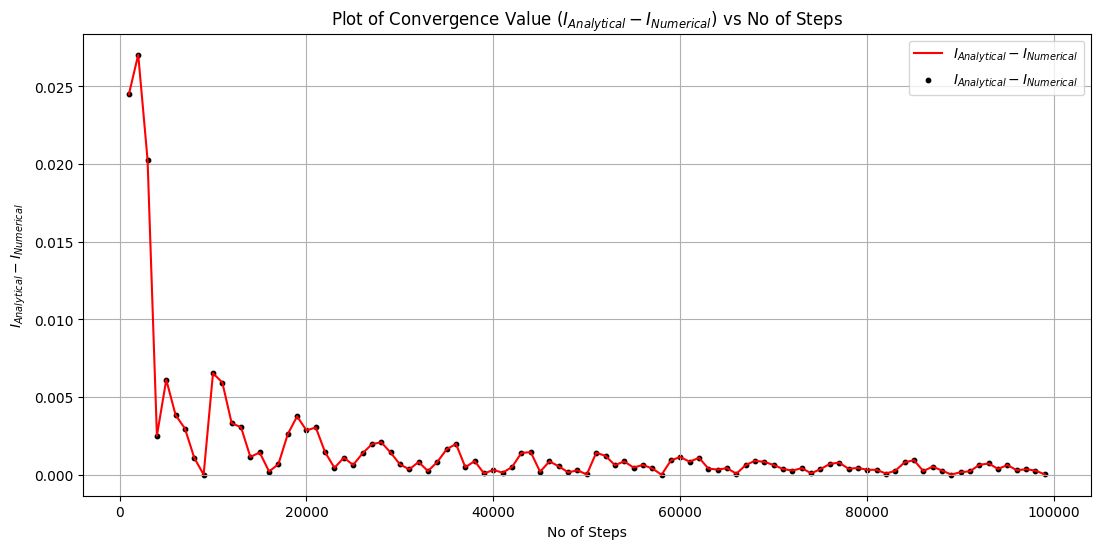

In [10]:
xlist = []
ylist = []
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
for i in range(1000,100000,1000):
    xlist.append(i)
    ylist.append(abs(2-lib.monte_carlo_integrate(f,x_min,x_max,i,17,multiplier=572,m=16381,c=0)))

plt.plot(xlist,ylist,label=r'$I_{Analytical} - I_{Numerical}$',color='red')
plt.scatter(xlist,ylist,label=r'$I_{Analytical} - I_{Numerical}$',color='black',s=10)
plt.xlabel('No of Steps')
plt.ylabel(r'$I_{Analytical} - I_{Numerical}$')
plt.title(r'Plot of Convergence Value ($I_{Analytical} - I_{Numerical}$) vs No of Steps')
plt.legend()
plt.grid()
plt.show()